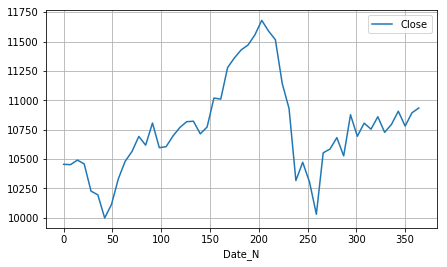

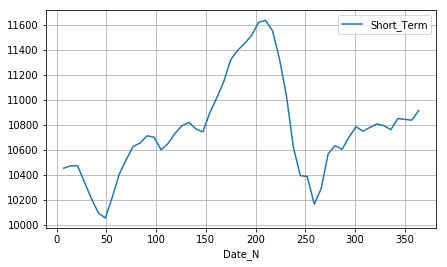

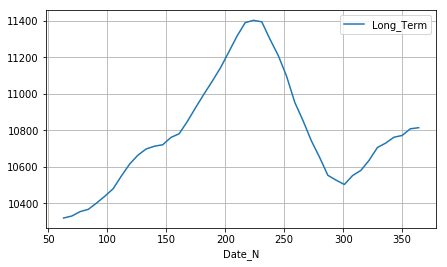

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#also have used weekly data for Nifty50 stock prices. Source : Yahoo Finance.
#using a short term and long term trading period i.e 2 weeks and 10 weeks

data = pd.read_csv('^NSEI.csv')




data['Date'] = pd.to_datetime(data['Date'])
data['Date_N'] = (data['Date']-data['Date'].min())/np.timedelta64(1,'D') #calculate number of days since the first date

#plot closing prices
data.plot(y='Close',x='Date_N',grid=True,figsize=(7,4))


data['Short_Term'] = np.round(data['Close'].rolling(window=2).mean(),2)#short term mean for biweekly closing price,initially first  row in this coloumn is empty
data['Long_Term'] = np.round(data['Close'].rolling(window=10).mean(),2)#long term mean for the past 10 weeks

data.plot(y='Short_Term',x='Date_N',grid=True,figsize=(7,4))
data.plot(y='Long_Term',x='Date_N',grid=True,figsize=(7,4))


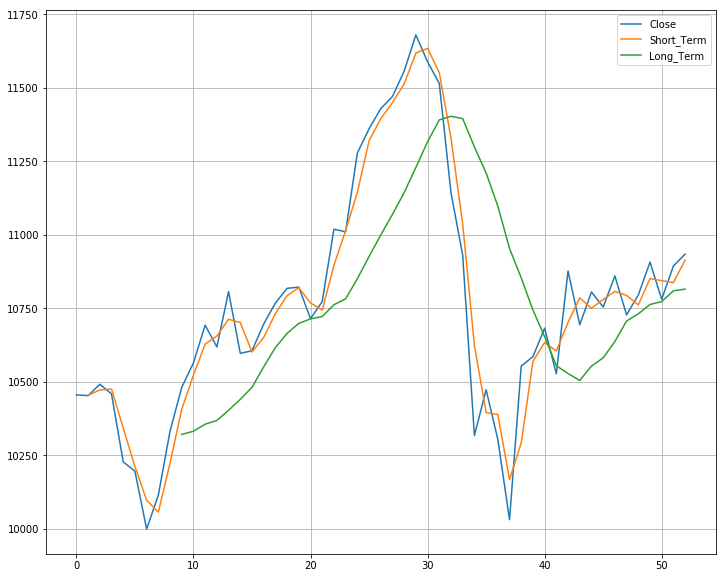

In [39]:

#plot weekly,biweekly and 10 week closing price
attributes = ['Close','Short_Term','Long_Term']
data[attributes].plot(grid=True,figsize=(12,10))

In [55]:
data['Diff'] = data['Short_Term'] - data['Long_Term']
data['Diff'].mean()
X = 55 #mean diffrence between short and long term closing prices,could have been arbitary.
#generating buy,hold,and sell signals
#1 means  that short term SMA is above Long term sma
#0 means both are at equal positions
#-1 means short term SMA is below long term SMA
data['Signal'] = np.where(data['Diff']>X,1,0)
data['Signal'] = np.where(data['Diff']<X,-1,data['Signal'])
data['Signal'].value_counts()


 1    30
-1    14
 0     9
Name: Signal, dtype: int64

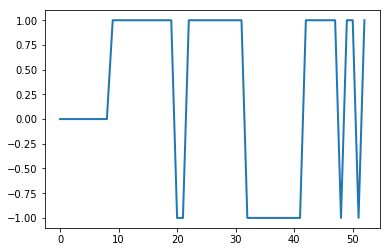

In [48]:
data['Signal'].plot(lw=2,ylim=[-1.1,1.1])